### 911 calls Exploratory Analysis 

#### The database is a record of all records the emergency 911 calls over an interval of time. each call is recorded as an instance while recording features of each call. The features are broken down as follows:

##### These two features represent the location as identified by the Opearator

1. lat : String variable, Latitude

2. lng: String variable, Longitude

3. desc: String variable, Description of the Emergency Call, reason and nature of emergency

4. zip: String variable, Zipcode of the reporter as provided by the caller

5. title: String variable, Title

6. timeStamp: String variable, YYYY-MM-DD HH:MM:SS

7. twp: String variable, Township

8. addr: String variable, Address

9. e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#if we want to install any external library
!pip install numpy

In [3]:
np.__version__

'1.24.3'

In [4]:
cal=pd.read_csv('911.csv')

In [5]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
cal.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
dtype: object

In [8]:
cal.zip.isna().sum()

12855

In [9]:
z=cal.zip.mode()

In [10]:
z[0]

19401.0

In [11]:
cal.zip = cal.zip.fillna(z[0])

In [12]:
cal.zip.isna().sum()

0

In [13]:
cal.zip = cal.zip.astype('int')

In [14]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        99492 non-null  int32  
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 6.5+ MB


In [15]:
cal

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [16]:
cal.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [17]:
cal.zip.unique()

array([19525, 19446, 19401, 19044, 19426, 19438, 19462, 19428, 19040,
       19027, 18936, 18974, 19031, 19403, 19422, 19085, 18964, 19038,
       19406, 19468, 19010, 19095, 19464, 19444, 19041, 19440, 19405,
       19002, 19096, 19454, 19465, 19004, 19066, 19072, 18041, 19046,
       19090, 19012, 19025, 19473, 18073, 18969, 18074, 19460, 19001,
       18054, 19009, 19006, 19035, 19150, 19075, 19034, 19151, 19453,
       19003, 18914, 19512, 18976, 19120, 18915, 18076, 19477, 19087,
       18966, 19131, 19128, 19083, 19053, 19475, 18960, 19504, 18070,
       19492, 18932, 19118, 18092, 19490, 19518, 18056, 19119, 19107,
       18103, 17752, 19111, 18927, 19435, 18951, 19472, 19503, 19126,
       19505, 19423, 19138, 36107, 18036, 19116, 19139, 19129, 19115,
       19355, 77316, 19457, 19082, 19127])

In [18]:
cal.zip.nunique()

104

### what are the top 5 zipcodes on the basis of count for 911 calls?

In [19]:
cal.zip.value_counts()

zip
19401    19834
19464     6643
19403     4854
19446     4748
19406     3174
         ...  
19119        1
77316        1
19457        1
19107        1
19127        1
Name: count, Length: 104, dtype: int64

In [20]:
cal.zip.value_counts().head()

zip
19401    19834
19464     6643
19403     4854
19446     4748
19406     3174
Name: count, dtype: int64

In [21]:
cal.zip.value_counts().tail()

zip
19119    1
77316    1
19457    1
19107    1
19127    1
Name: count, dtype: int64

<Axes: xlabel='zip'>

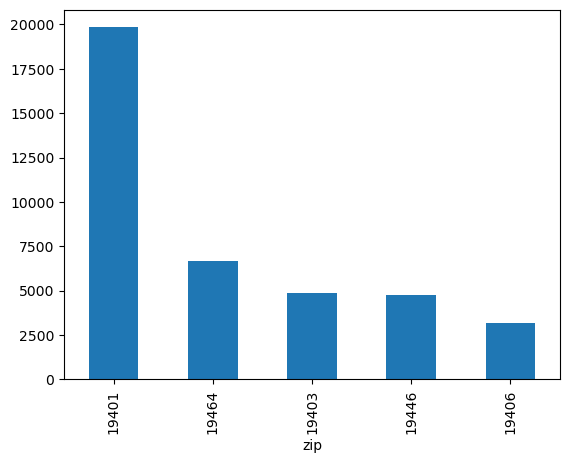

In [22]:
top = cal.zip.value_counts().head()
top.plot(kind='bar')

<Axes: xlabel='zip'>

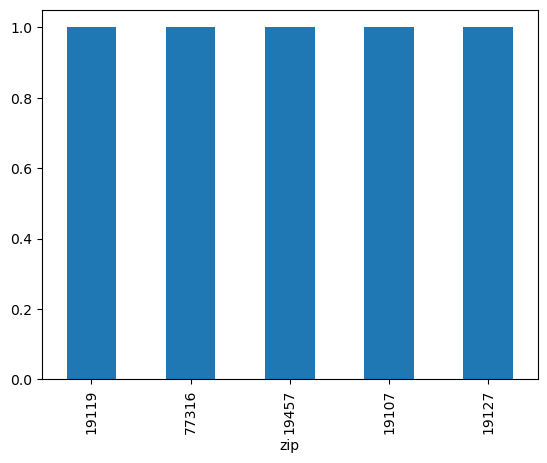

In [23]:
top = cal.zip.value_counts().tail()
top.plot(kind ='bar')

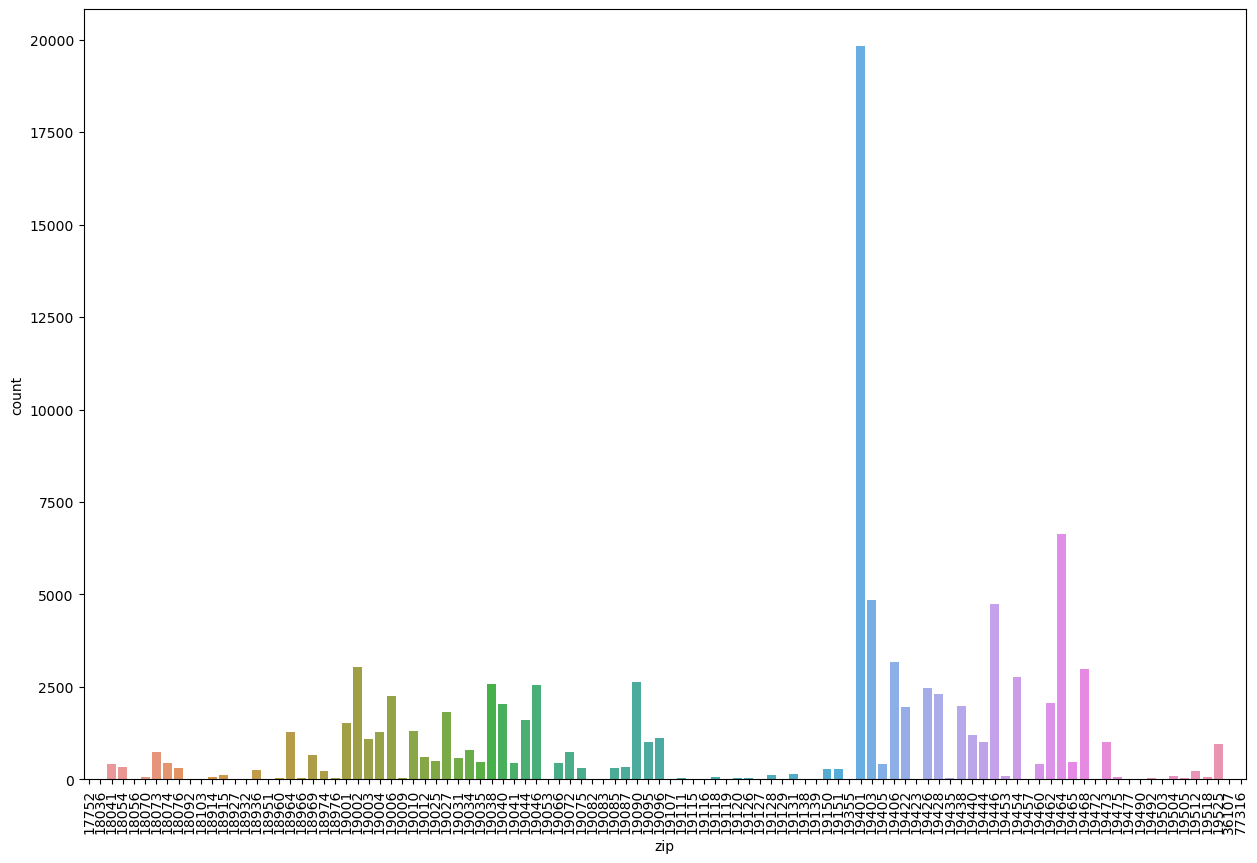

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x='zip', data=cal)
plt.xticks(rotation=90)
plt.show()

In [25]:
cal.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [26]:
cal.twp.value_counts()

twp
LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: count, Length: 68, dtype: int64

In [27]:
cal.twp.value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [28]:
b= cal.twp.head()
b

0          NEW HANOVER
1    HATFIELD TOWNSHIP
2           NORRISTOWN
3           NORRISTOWN
4     LOWER POTTSGROVE
Name: twp, dtype: object

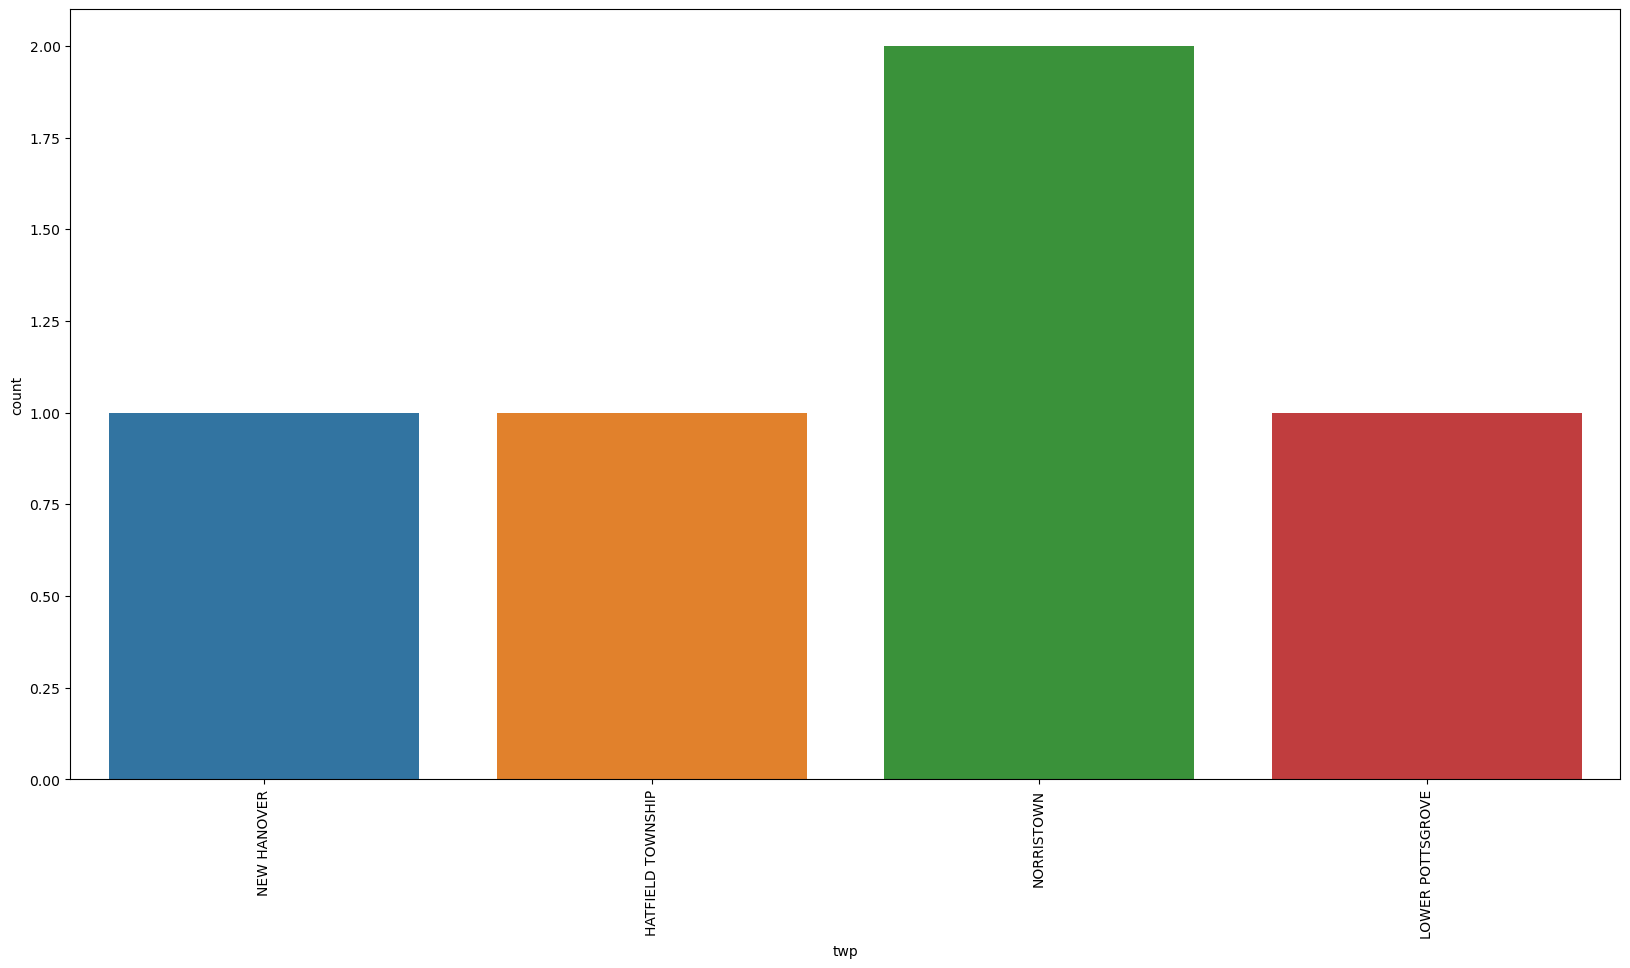

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x=b)
plt.xticks(rotation=90)
plt.show()

In [30]:
cal.title

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [31]:
cal.title.str.split(':')

0             [EMS,  BACK PAINS/INJURY]
1            [EMS,  DIABETIC EMERGENCY]
2                [Fire,  GAS-ODOR/LEAK]
3             [EMS,  CARDIAC EMERGENCY]
4                     [EMS,  DIZZINESS]
                      ...              
99487    [Traffic,  VEHICLE ACCIDENT -]
99488    [Traffic,  VEHICLE ACCIDENT -]
99489               [EMS,  FALL VICTIM]
99490           [EMS,  NAUSEA/VOMITING]
99491    [Traffic,  VEHICLE ACCIDENT -]
Name: title, Length: 99492, dtype: object

# Creating new features

** In the title column there are 'Reasons/Departments' specified before the title code. These are EMS, Fire and Traffic.
   Use.apply() with a custom lambda expression to create a new column called 'Reason' that contains the string value.**

In [32]:
x=cal['title'][0]
x

'EMS: BACK PAINS/INJURY'

In [33]:
x.split(':')[0]

'EMS'

In [34]:
x

'EMS: BACK PAINS/INJURY'

In [35]:
x[0]

'E'

In [36]:
new_feature=cal.title.apply(lambda x:x.split(':')[0])
new_feature

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [37]:
cal['reason']=new_feature

In [38]:
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [39]:
cal

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


## **What is the most common reason for a 911 call based off this new column?**

In [40]:
cal.reason

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [41]:
cal['reason'].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: ylabel='count'>

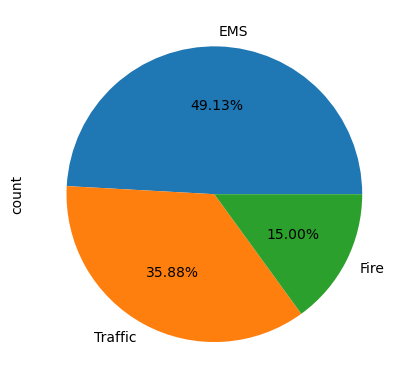

In [42]:
cal['reason'].value_counts().plot(kind='pie',autopct='%.2f%%')

From above graph, we can see, most calls are from EMS category and percentage is 49%. out of total 3, summary is as follows:-EMS: 49%, Fire: 15%, Traffi: 35%.

## **Use seaborn to create a countplot of 911 calls by reason**

<Axes: xlabel='reason', ylabel='count'>

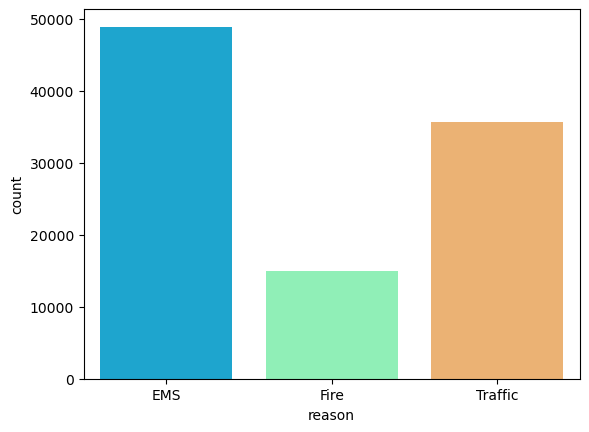

In [43]:
sns.countplot(x='reason',data=cal, palette='rainbow')

## what is the data type of the objects in the timestamp column?

In [44]:
cal.timeStamp

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [45]:
type(cal['timeStamp'].iloc[0])

str

## Convert timeStamp from strings to DateTime object

In [46]:
cal['timeStamp']=pd.to_datetime(cal['timeStamp'])
type(cal['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
cal.timeStamp

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

* Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week.
Create these columns based off of the timeStamp column

In [48]:
time=cal['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [49]:
cal['timeStamp'].apply(lambda time: time.hour)

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int64

In [50]:
cal['Hour']=cal['timeStamp'].apply(lambda time: time.hour)

In [51]:
cal['Hour'].value_counts().head()

Hour
17    6517
16    6490
15    6154
12    6029
14    5997
Name: count, dtype: int64

In [52]:
cal['Month']=cal['timeStamp'].apply(lambda time: time.month)
cal['Month'].value_counts().sort_index()

Month
1     13205
2     11467
3     11101
4     11326
5     11423
6     11786
7     12137
8      9078
12     7969
Name: count, dtype: int64

In [53]:
cal['Day of Week'] = cal['timeStamp'].apply(lambda time : time.dayofweek)
cal['Day of Week'].value_counts()

Day of Week
1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: count, dtype: int64

In [54]:
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


## Notice how the Day of Week is an integer 0-6. Use the .map() with a dictionary to map the actual string names to the day of the week

In [55]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat'}
dmap

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat'}

In [56]:
cal['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [57]:
cal['Day of Week']=cal['Day of Week'].map(dmap)

In [58]:
cal['Day of Week'][:4]

0    Thu
1    Thu
2    Thu
3    Thu
Name: Day of Week, dtype: object

In [59]:
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [60]:
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [61]:
cal['Day of Week'].value_counts()

Day of Week
Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Name: count, dtype: int64

## Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

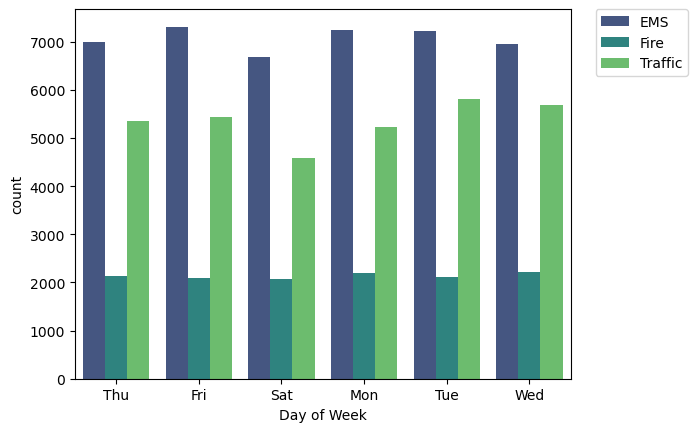

In [62]:
sns.countplot(x='Day of Week', data=cal,hue='reason',palette='viridis')
plt.rcParams["patch.force_edgecolor"] = True
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad= 0.)

## Use seaborn to create a countplot of the Month column with the hue based off the Reason column

In [63]:
cal.timeStamp.dt.hour

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int32

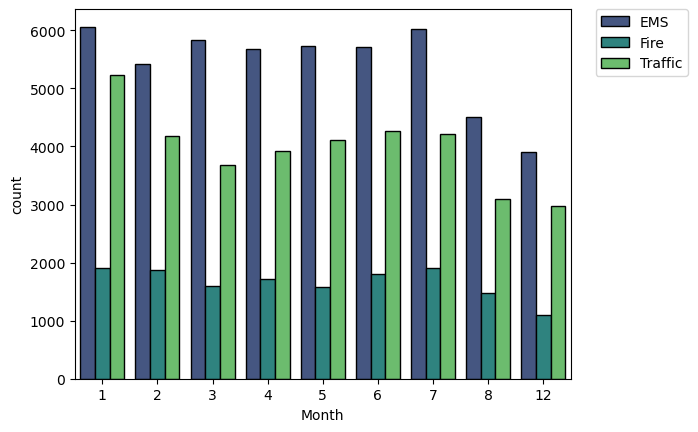

In [64]:
sns.countplot(x = 'Month', data = cal, hue = 'reason', palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

Do you notice something strange about this Plot? **
Plot is missing some months. May need to plot this information another way, possibly a simple line plot, that fills in the missing data.

** Create a groupby object called byMonth that groups the DataFrame by month and uses the count() method for aggregation

In [66]:
cal.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,11245
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,10238
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,9999
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,9838
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,9999
6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,10453
7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,10465
8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,8057
12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7062


In [68]:
byMonth=cal.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,11245
2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,10238
3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,9999
4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,9838
5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,9999


## create a simple plot off of the dataframe indicating the count of calls per month

<Axes: xlabel='Month'>

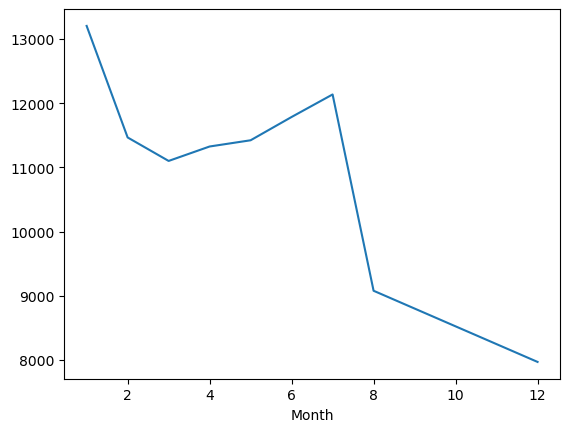

In [69]:
byMonth['lat'].plot()

** Use seaborn's lmplot() to create a linear fit on the number of calls per Month.   
Keep in mind you may need to reset the index to a column.**

In [70]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
0,1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,11245
1,2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,10238
2,3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,9999
3,4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,9838
4,5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,9999
5,6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,10453
6,7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,10465
7,8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,8057
8,12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7062


C:\Users\a2z\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


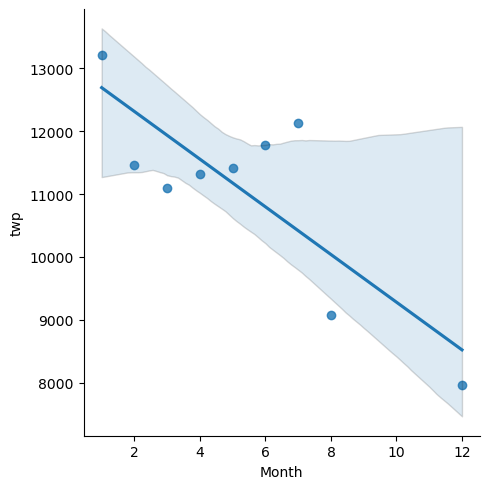

In [71]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

**Use apply along with the .date() method to create a new column called 'Date' that contains the date from the timeStamp column.**

In [72]:
t=cal['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:40:00')

In [73]:
t.date()

datetime.date(2015, 12, 10)

In [74]:
cal['Date']=cal['timeStamp'].apply(lambda t: t.date())
cal.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19401,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Grouby the Date column with the count() aggregate and create a plot of counts of 911 calls**

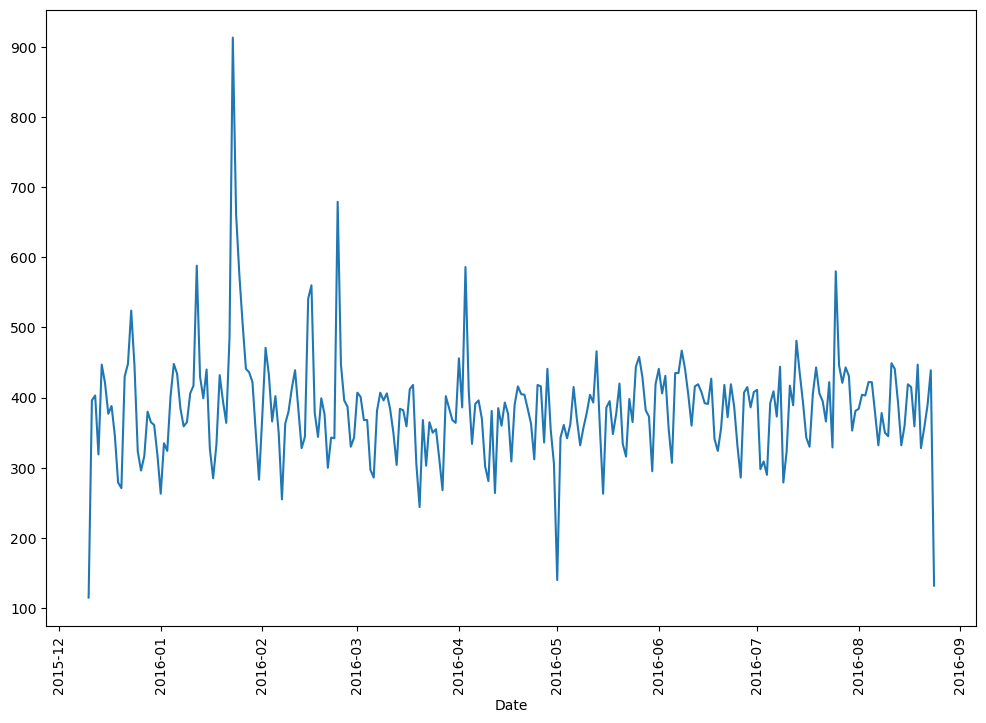

In [76]:
plt.figure(figsize=(12,8))
cal.groupby('Date').count()['lat'].plot()
plt.xticks(rotation='vertical')
plt.tight_layout
plt.savefig('graph_1.png',dpi=400)

In [78]:
cal.Date.nunique()

259

** Recreate plot above but create 3 separate plots representing reason for the 911 Call**

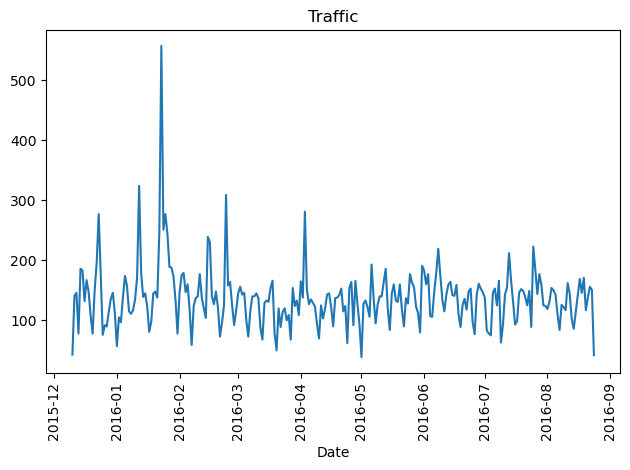

In [80]:
cal[cal['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

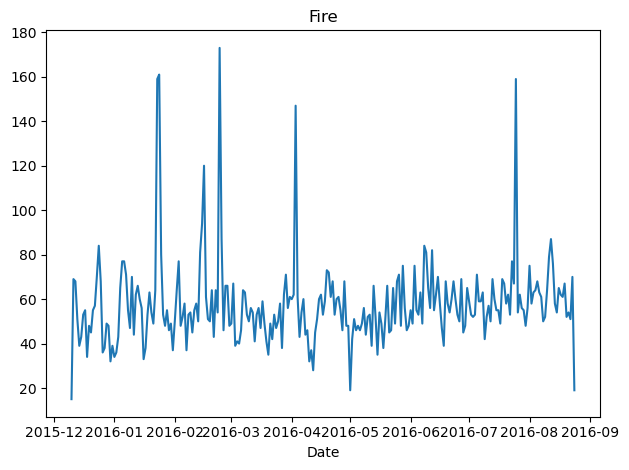

In [81]:
cal[cal['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

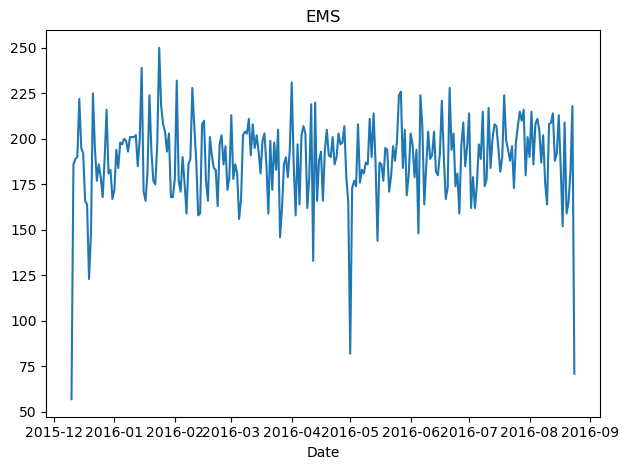

In [82]:
cal[cal['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

# Heat Maps
## By day of week

In [84]:
dayHour = cal.groupby(['Day of Week','Hour']).count()['reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<Axes: xlabel='Hour', ylabel='Day of Week'>

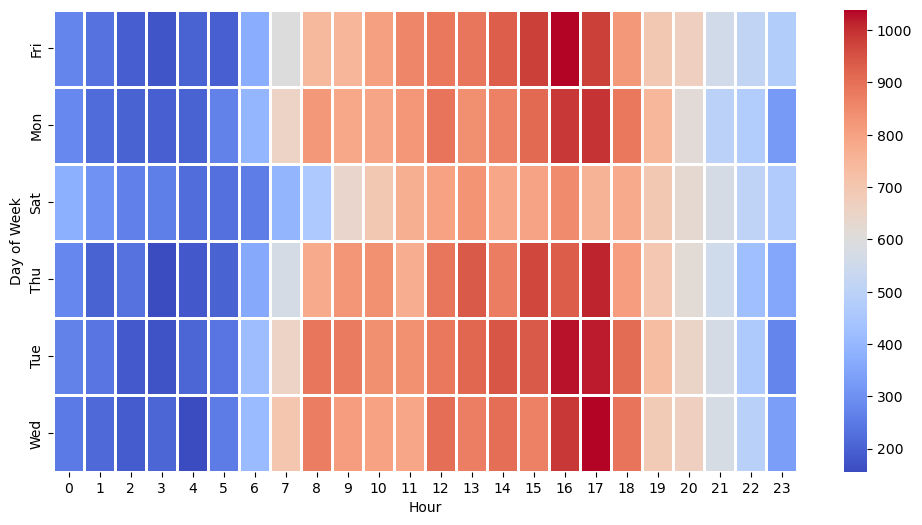

In [86]:
#create heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm',linewidths=2)


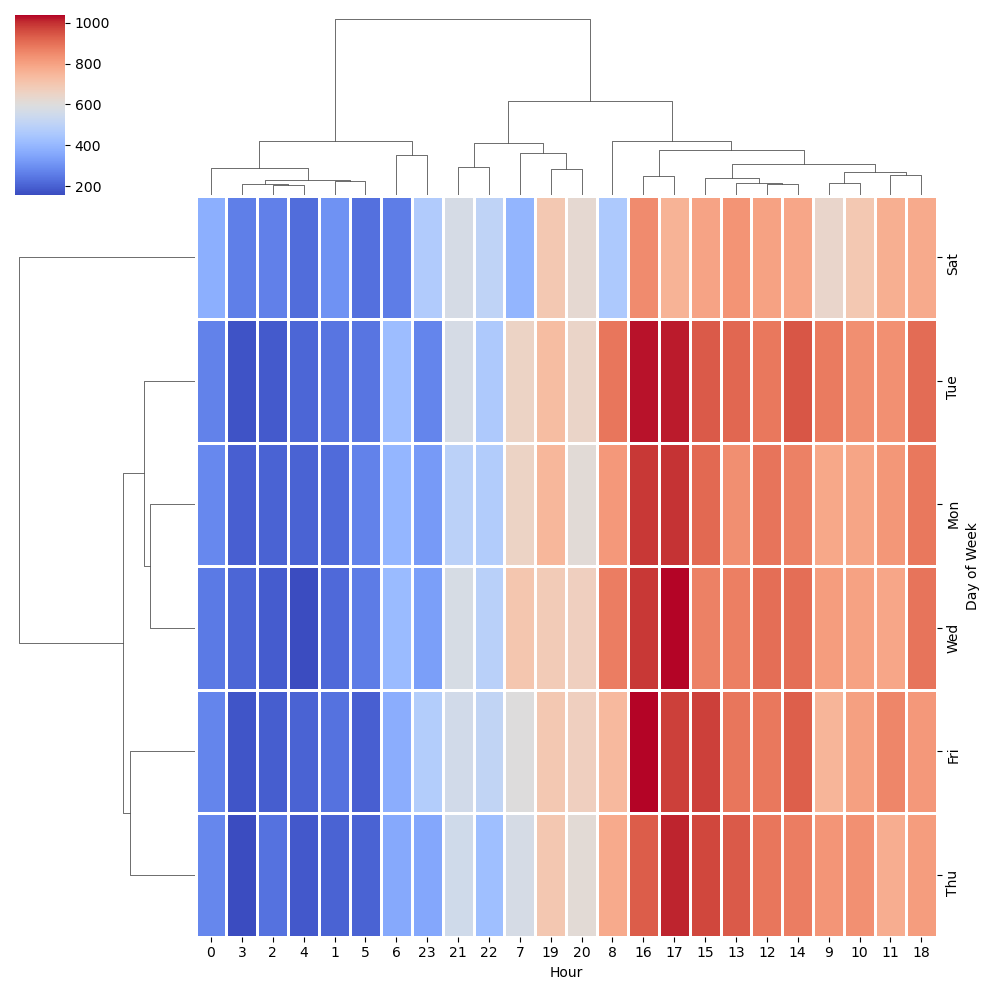

In [87]:
sns.clustermap(dayHour,cmap='coolwarm',linewidths=2)

In [88]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [90]:
d=sns.load_dataset('diamonds')

In [92]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [93]:
d.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

<Axes: xlabel='cut', ylabel='count'>

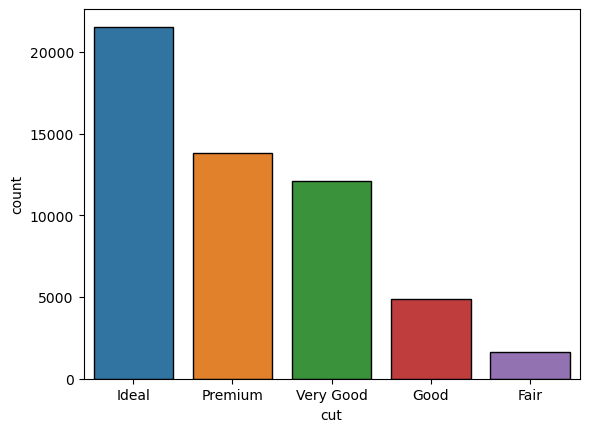

In [94]:
sns.countplot(x='cut',data=d)

C:\Users\a2z\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


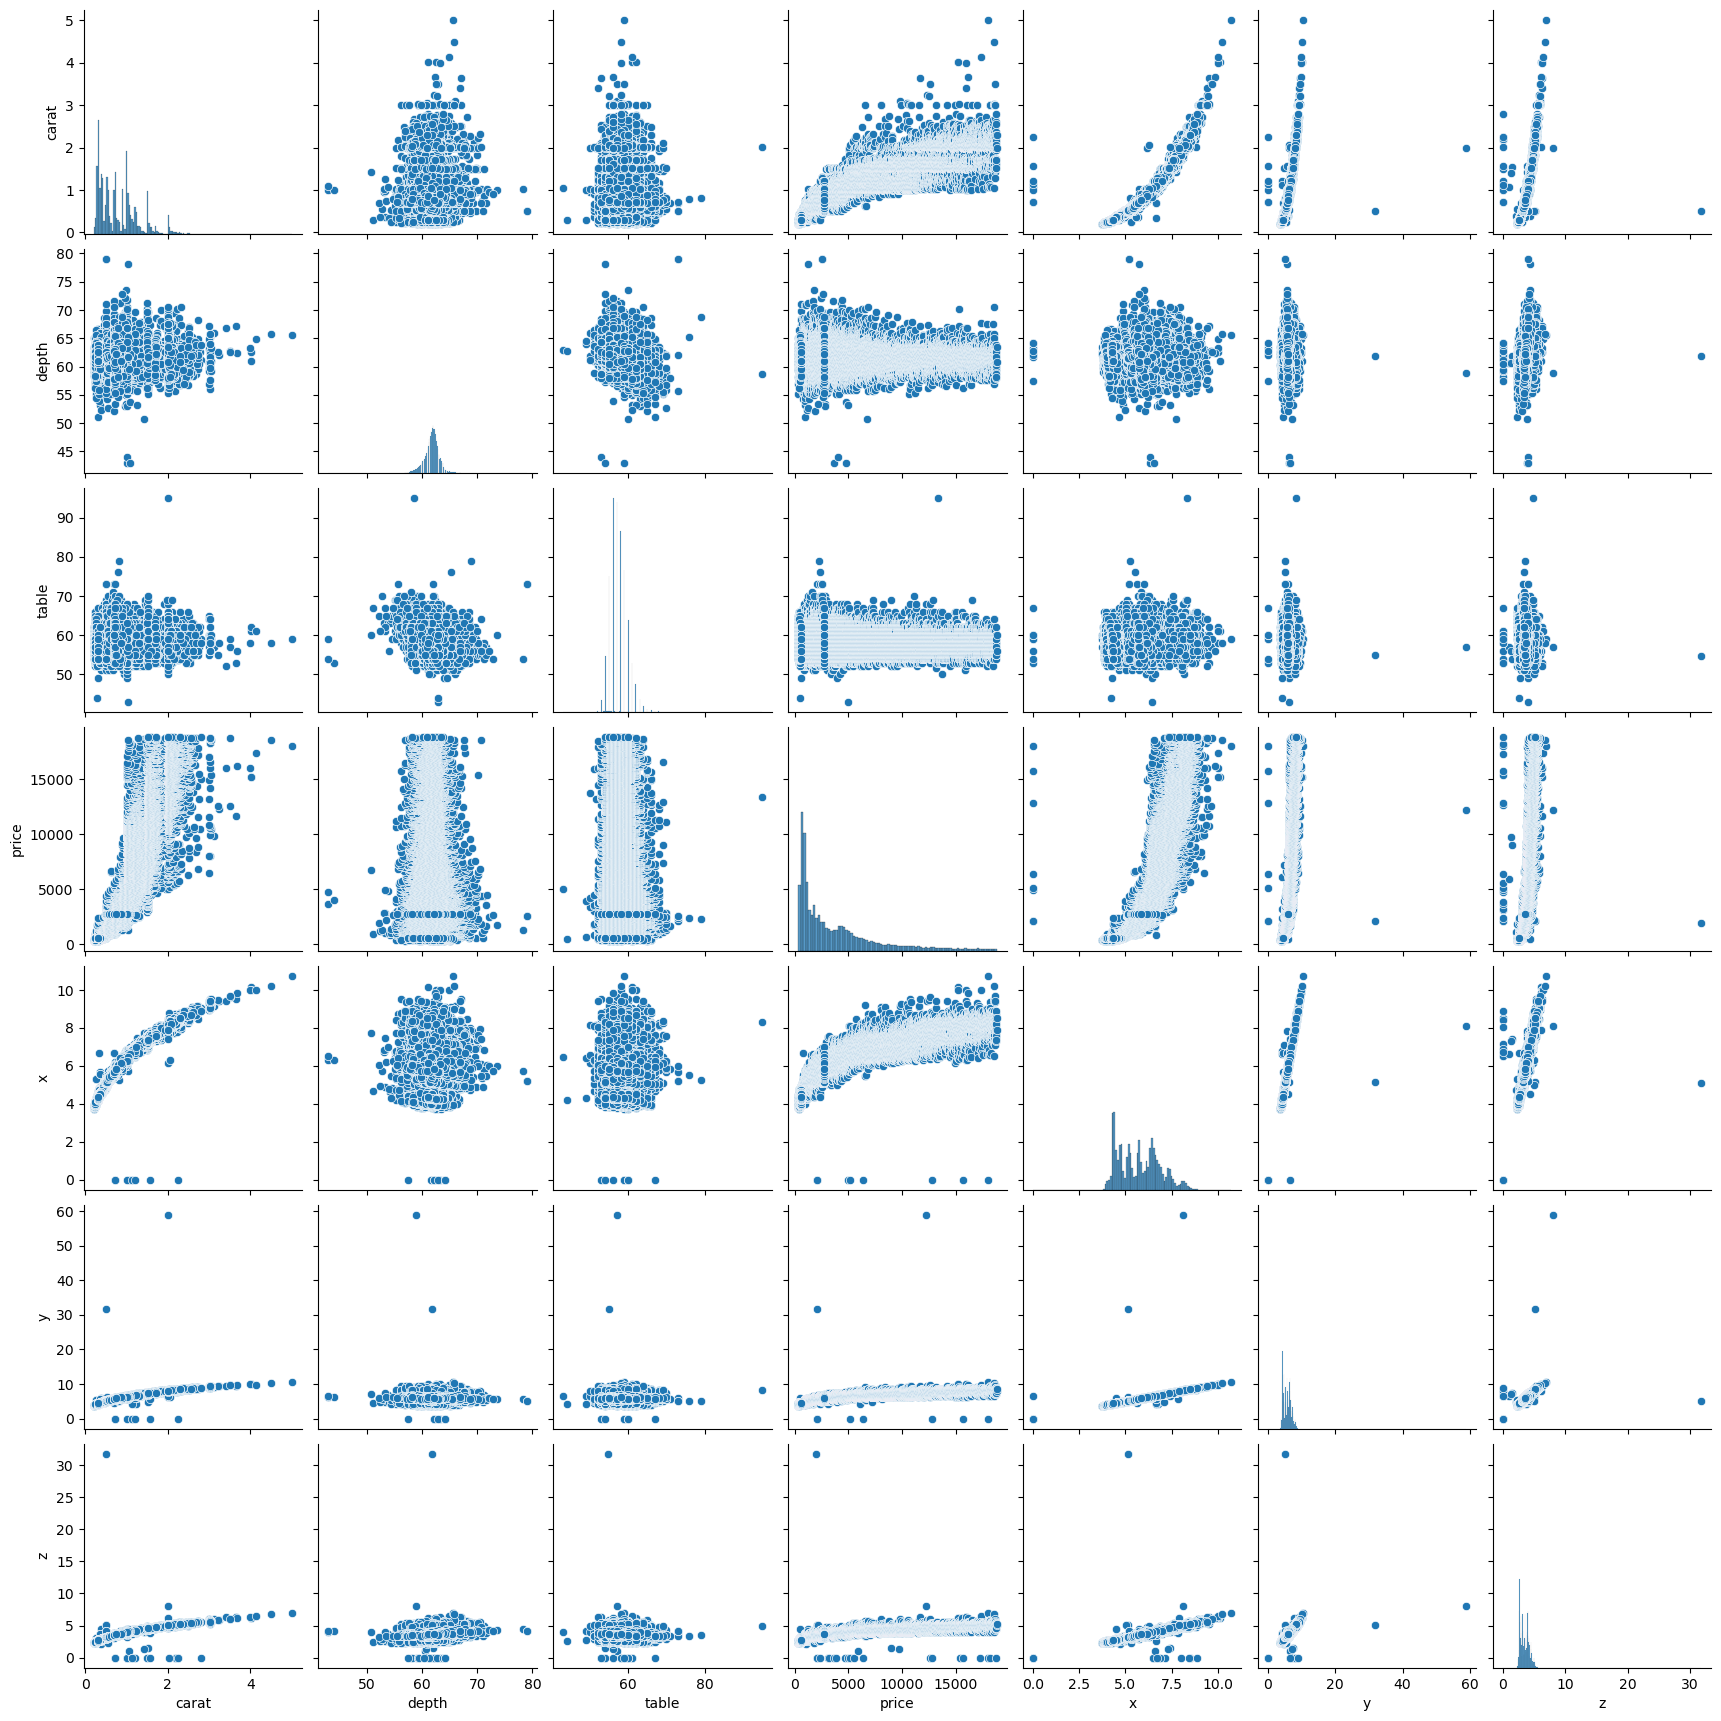

In [95]:
sns.pairplot(d)

In [96]:
d.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

C:\Users\a2z\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\a2z\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


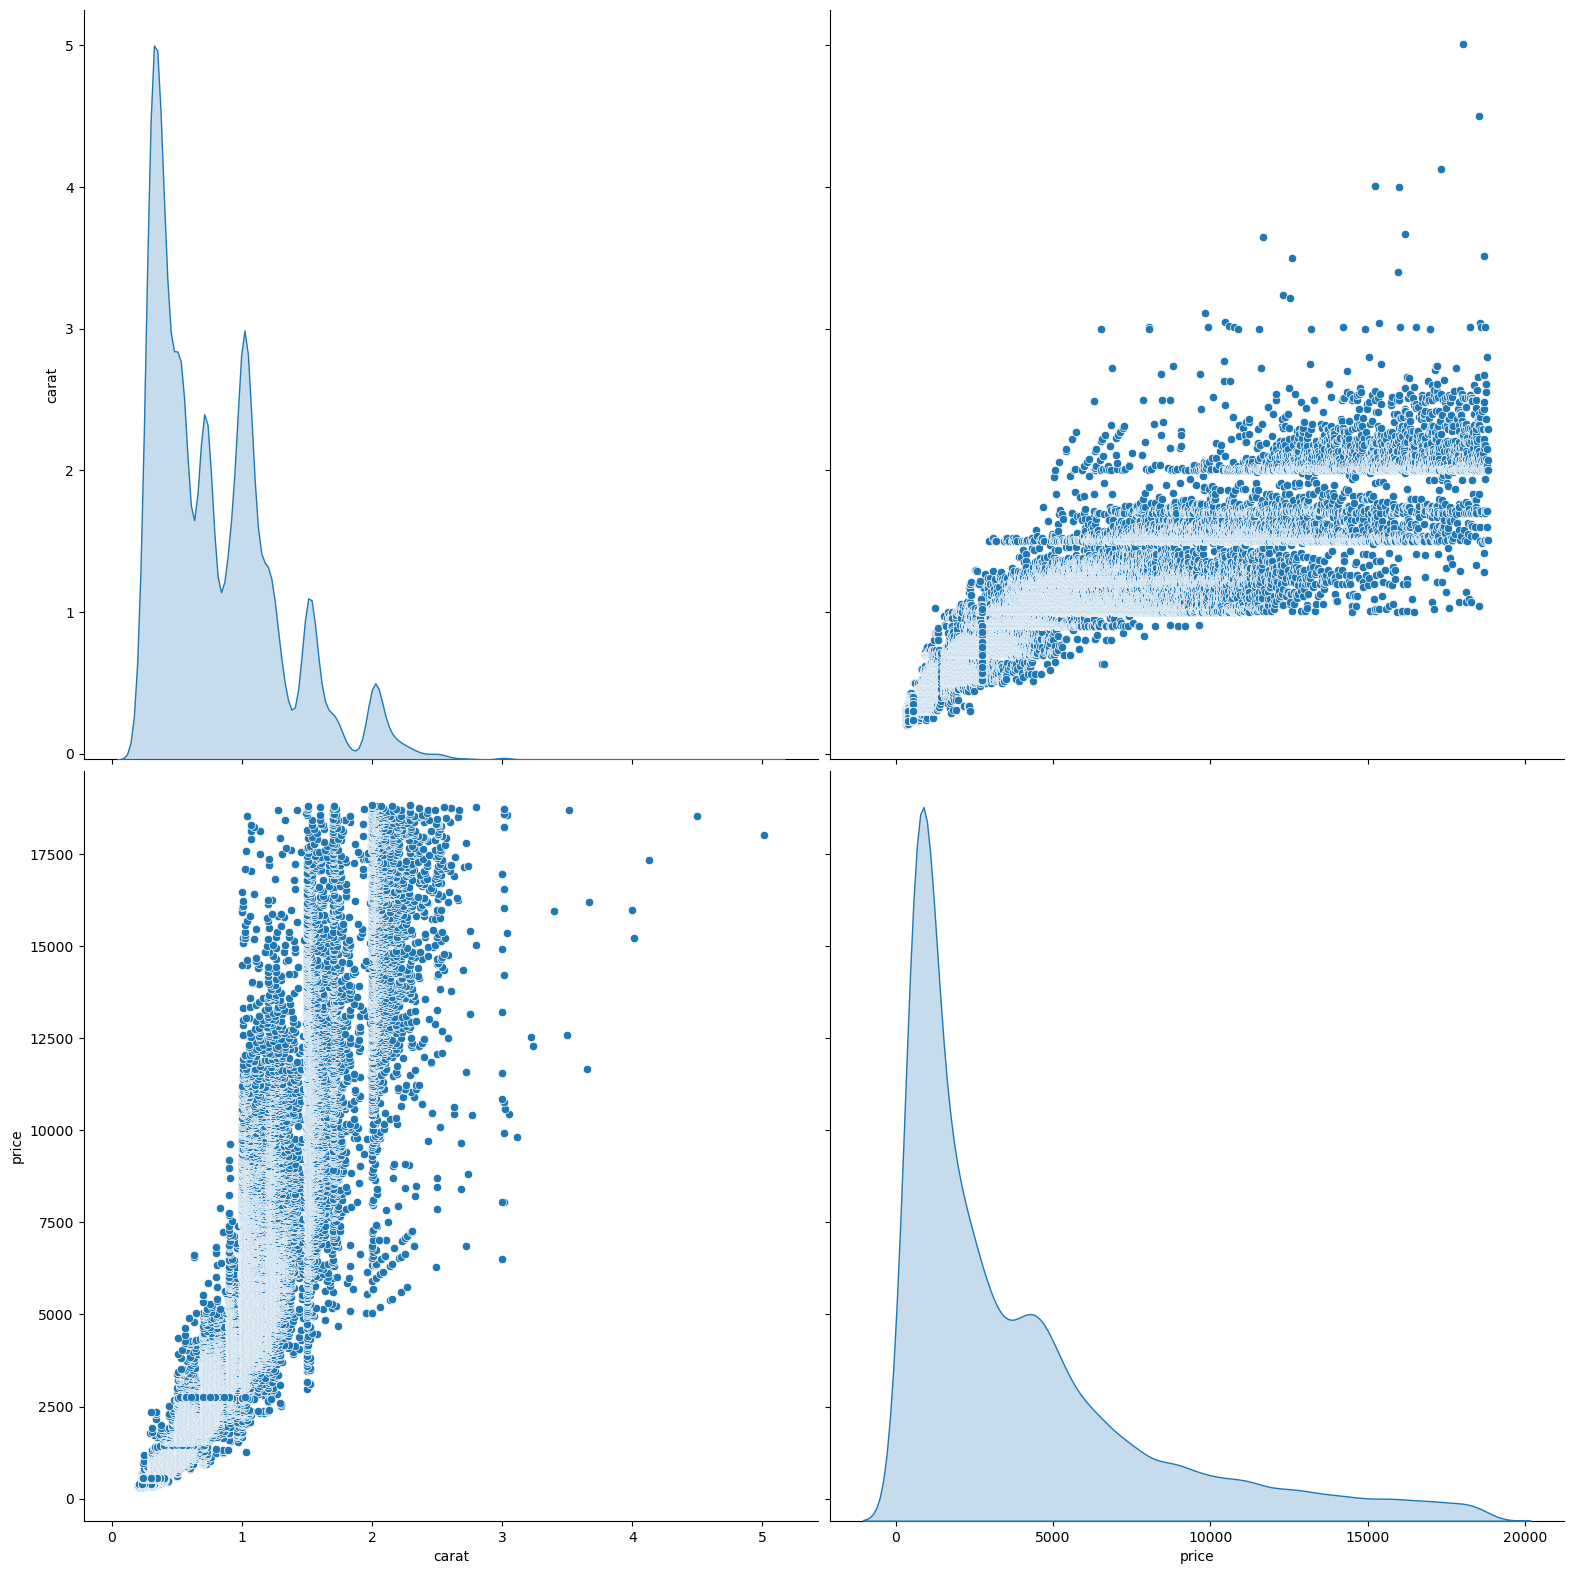

In [97]:
sns.pairplot(d[['carat', 'cut', 'color','price']],size=8,diag_kind='kde')

# Discussion and findings
- Most of the calls are for the reason of EMS followed by Traffic.


- January and December are the most emergency charged months of the year. Moreover, the reason for call is mainly EMS and Traffic Emergencies.


- The reporting of EMS across the hours of the day mainly spikes during working hours.


- Friday is the most day of the week with calls reporting EMS and Traffic Emergencies.


- The late hours of the night has the least emergency calls However on the weekends, there is a more emergency calls after midnight.